<a href="https://colab.research.google.com/github/Codassah/Azubi_assessment-Esther/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

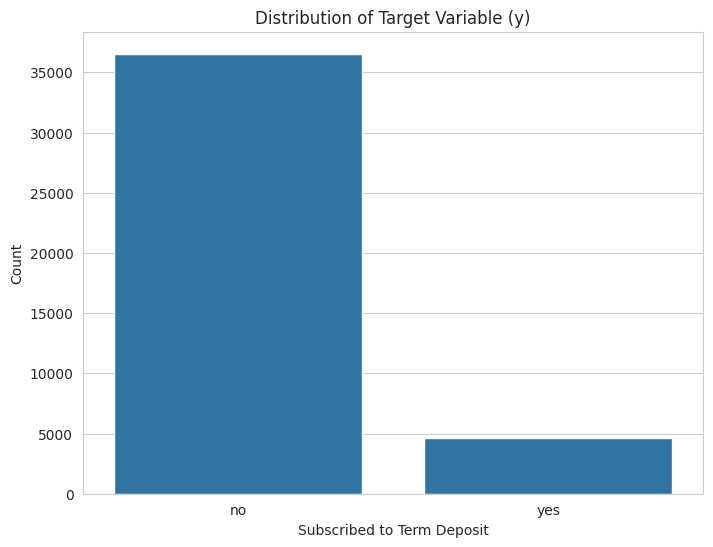

Total samples: 41188
Subscribed (yes): 4640 (11.27%)
Not subscribed (no): 36548 (88.73%)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Visualize target variable distribution
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# Print counts and percentages
total = len(df)
yes_count = df['y'].value_counts()['yes']
no_count = df['y'].value_counts()['no']
print(f"Total samples: {total}")
print(f"Subscribed (yes): {yes_count} ({yes_count/total*100:.2f}%)")
print(f"Not subscribed (no): {no_count} ({no_count/total*100:.2f}%)")

# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical features using one-hot
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)